In [2]:
using LinearAlgebra
using Plots

In [3]:
#sistem = [fi,omega] = kot, kotna hitrost

#odvod = [omega, -(g/l)*sin(fi)]

"""
    Odvod odmika matematičnega nihala.
    Vhod:
        x: trenutni odmik in prvi odvod odmika (kot in kotna hitrost)
        g: težni pospešek
        l: dolžina vrvice
    Izhod:
        der: prvi in drugi odvod odmika (kotna hitrost, kotni pospešek)
"""
der(x,g,l) = [x[2],-(g/l)*sin(x[1])]

der

In [4]:
"""
    Izračuna spremembo stanja sistema po enem koraku po metodi euler
"""
function euler_step(x,der,h)
    return x + der(x)*h
end

"""
    Izračuna spremembo stanja sistema po enem koraku po metodi Runge-Kutta četrtega reda.
    Vhod:
        x: trenutno stanje sistema
        der: odvod sistema
        h: časovna enota koraka
    Izhod:
        y: novo stanje sistema 
"""
function rungekutta_step(x,der,h)
    k1 = h*der(x)
    k2 = h*der(x+k1/2)
    k3 = h*der(x+k2/2)
    k4 = h*der(x+k3)
    return x + (k1 + 2k2 + 2k3 + k4)/6
end

rungekutta_step

In [5]:
"""
    x1 in x2 sta dve vrednosti linearne funkcije ob časih 0 in 1. Izračuna, ob katerem času je funkcija 0.
"""
function presecisce(x1,x2)
    len = abs(x1-x2)
    ratio = abs(x1/len)
    return ratio
end
"""
    Izračuna nihanje matematičnega nihala po začetnih pogojih
    Vhod:
        l: dolžina vrvice
        t: končni čas
        theta0: začetni kot
        dtheta0: začetna kotna hitrost
        n: število korakov
    Izhod:
        y: končni kot
        ys: zaporedje kotov čez čas
        t: časovni odmiki kotov
        nicle: časovni odmiki, pri katerih je kot 0
"""
function nihalo(l,t,theta0,dtheta0,n)
    h = t/n
    x = [theta0,dtheta0]
    g = 9.80665
    
    odmik = [theta0]
    ts = t*(0:n)/n
    nicle = []
    
    for i=1:n
        #x = euler_step(x,x->der(x,g,l),h)
        prev_x = x
        x = rungekutta_step(x,x->der(x,g,l),h)
        
        odmik = vcat(odmik,x[1])
        
        if prev_x[1]*x[1] < 0     #iščemo ničlo natančnejše
            ratio = h
            y = x
            
            ratio = presecisce(prev_x[1],y[1])*ratio        #izračunamo časovni korak, da pridemo do ničle, če bi bilo premikanje linearno
            
            for i=1:10
                y = rungekutta_step(prev_x,x->der(x,g,l),ratio)       #izračunamo dejansko stanje, če se premaknemo za izračunan korak
                ratio = presecisce(prev_x[1],y[1])*ratio              #izračunamo nov časovni korak, in to iteriramo
            end
            
            nicle = vcat(nicle,ts[i]+ratio)
        end
        
        
    end
    return x[1], odmik, ts, nicle
end
"""
    Izračunamo periodo nihanja iz zaporedja vrednosti in njihovih časov. To naredimo s iskanjem dveh zaporednih ničel funkcije.
    Ker je sin(x)~~x, ko x~~0, predpostavimo, da je funkcija ob ničli linearna.

    Deprecated, ker se uporablja natančnejša metoda pri računanju samega nihala
"""
function perioda(x,t)
    
    ts = []

    for i=2:size(x)[1]
        if x[i-1]*x[i] < 0
            len = abs(x[i-1]-x[i])
            ratio = abs(x[i-1]/len)
            t1 = t[i]*ratio+t[i-1]*(1-ratio)
            ts = vcat(ts,t1)
            if size(ts)[1] >= 2
                return (ts[2]-ts[1])*2
                return ts
            end
        end
    end
end

perioda

Perioda je, za zelo majhne začetne energije, enaka kot pa izračunana za harmonično nihalo po enačbi. Če večamo začetno energijo, pa perioda raste exponentno.

In [6]:
l = 1
g = 9.80665
o = 0.5

odmik, z, time, nicle = nihalo(l,2pi,o,0,100)
#display(odmik)
#display(nicle)
display((nicle[2]-nicle[1])*2)
display((nicle[4]-nicle[2]))
display((nicle[3]-nicle[1]))

display(perioda(z,time))

2pi*sqrt(l/g)

2.038237955883792

2.0382375826478327

2.038237796344221

2.0382373547941786

2.0064092925890407

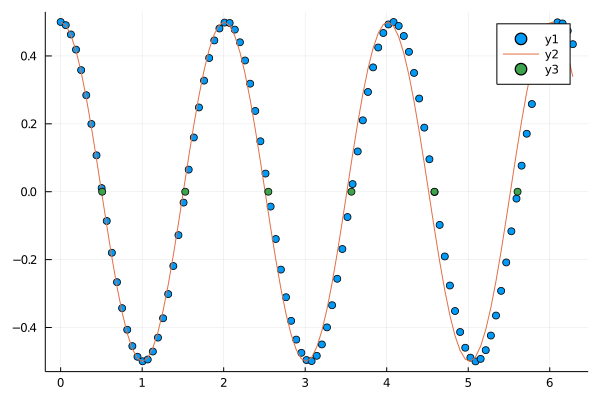

In [7]:
scatter(time, z)
plot!(time, x->cos(x/sqrt(l/g))*o)
scatter!(nicle,zeros(size(nicle)))


In [71]:
#graf periode glede na začetni kot/višino

l=1

ts = []
cs = []
for i=0.01:0.01:pi
    odmik, z, time, nicle = nihalo(l,4pi,i,0,1000)
    ts = vcat(ts,(nicle[2]-nicle[1])*2)
    cs = vcat(cs,(-cos(i)+1)*l)
end

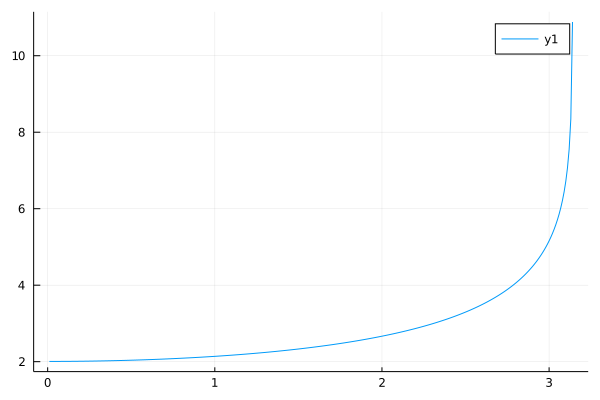

In [72]:
plot(0.01:0.01:pi,ts)

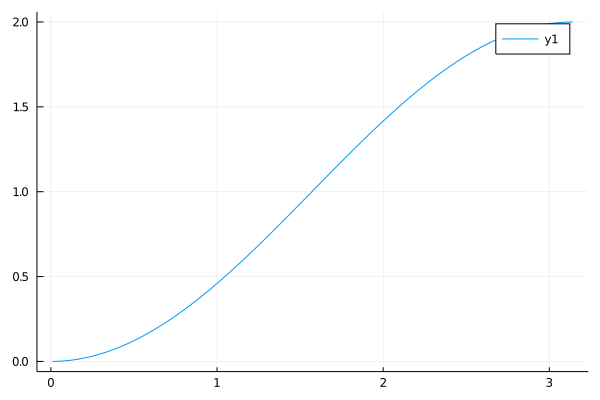

In [73]:
plot(0.01:0.01:pi,cs)